In [1]:
import os
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
feather_dict = {
    'wiki': 'wiki_crop',
    'imdb': 'imdb',
    'utk': 'UTKFace',
    'cacd': 'cacd.feather',
    'facial': 'facial-age.feather',
    'asia': 'All-Age-Faces',
    'afad': 'AFAD-Full'
}

In [3]:
'''
    input:  row: a row of data, containt encoded image information
            type: depend on which type of training, using just a original img or combine with 3 neighbor imgs
    output: an images list with decoded image information
'''
def image_decode(row, type='ori'):
    row = row[1]
    if type == 'ori':
        images_list = [row.img_ori]
    else:
        images_list = [row.img_box1, row.img_box2, row.img_box3]

    for idx, img in enumerate(images_list):
        img = np.frombuffer(img, np.uint8)
        img = cv2.imdecode(img, cv2.IMREAD_COLOR)
        images_list[idx] = img

    return images_list

In [4]:
'''
    input:  data_path: the folder that contants all avaiable data folder in *.feather
            source: which data will be used
    output: a dataframe which a combination of data in all sources 
'''
def load_data_all(data_path, source):
    source = source.split('|')
    init_df = True
    dataframe = pd.DataFrame()

    for s in source:
        feather_folder = feather_dict[s]
        feather_path = os.path.join(data_path, feather_folder)

        all_feather_files = os.listdir(feather_path)

        for feather in all_feather_files:

            feather_dir = os.path.join(feather_path, feather)
            loaded_data = pd.read_feather(feather_dir)

            # For first dataframe loaded
            if init_df:
                dataframe = loaded_data
                init_df = False
            else:
                dataframe = pd.concat([dataframe, loaded_data], ignore_index=True, sort=False)

            print(loaded_data.shape)
            print(feather_dir)
    print(dataframe.shape)

    # Filter
    dataframe = dataframe[(dataframe['age'] > 0) & (dataframe['age'] < 101)]
    dataframe = dataframe.dropna()

    return dataframe

## Change this to plot different dataset analysis

In [9]:
data = load_data_all("D:\Data", "imdb")

(8081, 6)
D:\Data\imdb\imdb_crop.feather
(38382, 6)
D:\Data\imdb\imdb_crop_100000.feather
(38706, 6)
D:\Data\imdb\imdb_crop_150000.feather
(38784, 6)
D:\Data\imdb\imdb_crop_200000.feather
(37283, 6)
D:\Data\imdb\imdb_crop_250000.feather
(37383, 6)
D:\Data\imdb\imdb_crop_300000.feather
(37136, 6)
D:\Data\imdb\imdb_crop_350000.feather
(37253, 6)
D:\Data\imdb\imdb_crop_400000.feather
(37054, 6)
D:\Data\imdb\imdb_crop_450000.feather
(38188, 6)
D:\Data\imdb\imdb_crop_50000.feather
(348250, 6)


In [10]:
def plot_count(idx, value):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(idx, value)
    plt.show()

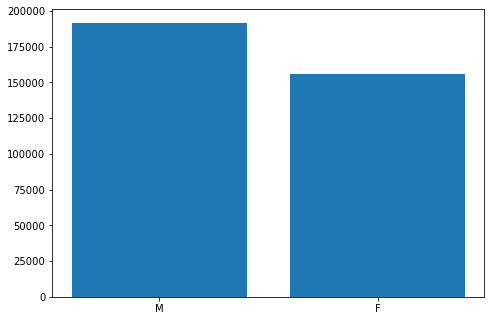

In [11]:
gen = data['gen'].value_counts().to_frame()
idx = ["M", "F"]
value = gen.gen
plot_count(idx, value)

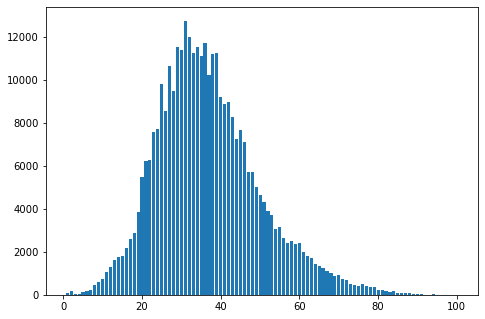

In [12]:
age = data['age'].value_counts().to_frame().sort_index()
idx = age.index
value = age.age
plot_count(idx, value)